# Import Dataset

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('AdmissionPredict.csv')

In [53]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [54]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


# Data Exploratory Analysis

## Dealing With Missing Data
Let's see which column has NaN values : 

In [56]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

Let's drop NaN values in Chance of Admit column:

In [57]:
df = df[df['Chance of Admit'].notna()]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...,...
394,395,329.0,111.0,4,4.5,4.0,9.23,1,0.89
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67


## For filling NaN vlues, we have 2 options:

1) Filling with median vlue of each column:

In [58]:
# we have missing data, only in 'GRE Score', 'TOEFL Score' and 'CGPA' columns.
temp_df_nonan = df.copy()
temp_df_nonan['GRE Score'].replace(np.nan, temp_df_nonan['GRE Score'].median(), inplace=True)
temp_df_nonan['TOEFL Score'].replace(np.nan, temp_df_nonan['TOEFL Score'].median(), inplace=True)
temp_df_nonan['CGPA'].replace(np.nan, temp_df_nonan['CGPA'].median(), inplace=True)
temp_df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         384 non-null    int64  
 1   GRE Score          384 non-null    float64
 2   TOEFL Score        384 non-null    float64
 3   University Rating  384 non-null    int64  
 4   SOP                384 non-null    float64
 5   LOR                384 non-null    float64
 6   CGPA               384 non-null    float64
 7   Research           384 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 30.0 KB


2) Finding correlation and filling with mean of subset of each column: (we choose this method for other parts)

### GRE Score

In [59]:
df.corr()['GRE Score'].drop('GRE Score').sort_values(ascending = False)

TOEFL Score          0.840993
CGPA                 0.830727
Chance of Admit      0.805076
University Rating    0.671549
SOP                  0.620963
Research             0.588385
LOR                  0.556729
Serial No.          -0.105022
Name: GRE Score, dtype: float64

We will group the dataframe by University Rating(Because there's a high correlation between ) and calculate the average value for GRE Score per University Rating

In [60]:
Per_UR = df.groupby('University Rating').mean()['GRE Score']
Per_UR

University Rating
1    303.520000
2    309.410526
3    315.790323
4    324.671875
5    328.642857
Name: GRE Score, dtype: float64

In [61]:
def fill_nan(uni_rating, second) :
  if np.isnan(second) : 
    return Per_UR[uni_rating]
  else :
    return second

df['GRE Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['GRE Score']),axis = 1)

In [62]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          19
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### TOEFL Score Column

In [63]:
df.corr()['TOEFL Score'].drop('TOEFL Score').sort_values(ascending = False)

GRE Score            0.834685
CGPA                 0.828364
Chance of Admit      0.783667
University Rating    0.689511
SOP                  0.647810
LOR                  0.556272
Research             0.509609
Serial No.          -0.153994
Name: TOEFL Score, dtype: float64

In [64]:
Per_UR = df.groupby('University Rating').mean()['TOEFL Score']
Per_UR

University Rating
1     99.240000
2    103.729167
3    107.000000
4    111.530303
5    113.800000
Name: TOEFL Score, dtype: float64

In [65]:
df['TOEFL Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['TOEFL Score']),axis = 1)

In [66]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### CGPA Column

In [67]:
df.corr()['CGPA'].drop('CGPA').sort_values(ascending = False)

Chance of Admit      0.872492
GRE Score            0.824538
TOEFL Score          0.824481
University Rating    0.750312
SOP                  0.720422
LOR                  0.669002
Research             0.527005
Serial No.          -0.058785
Name: CGPA, dtype: float64

In [68]:
Per_UR = df.groupby('University Rating').mean()['CGPA']
Per_UR

University Rating
1    7.750000
2    8.196064
3    8.550000
4    9.020746
5    9.316909
Name: CGPA, dtype: float64

In [69]:
df['CGPA'] = df.apply(lambda row : fill_nan(row['University Rating'],row['CGPA']),axis = 1)

In [70]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Scatterplot

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Serial No.', ylabel='Chance of Admit'>

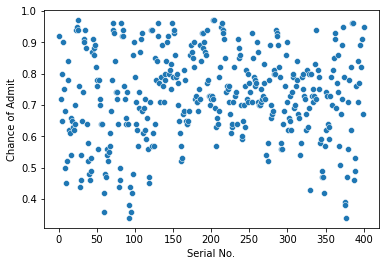

In [79]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Serial No.')

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

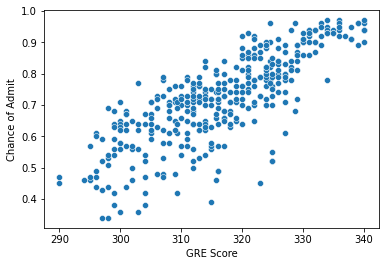

In [78]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'GRE Score')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

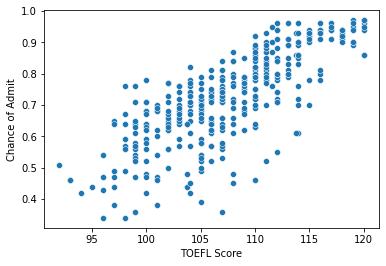

In [73]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'TOEFL Score')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

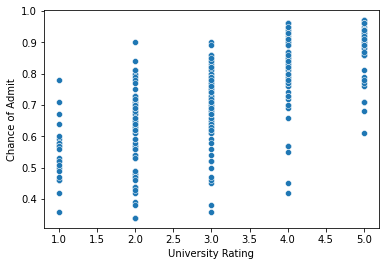

In [74]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'University Rating')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

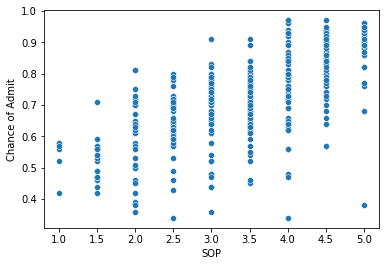

In [75]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'SOP')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

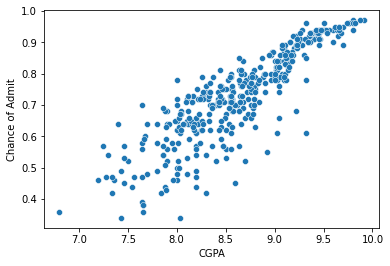

In [76]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'CGPA')

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

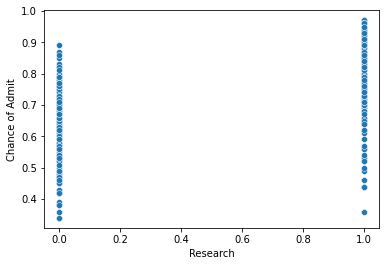

In [80]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Research')

It seems **CGPA** correlates more with Chance of Admission. if you ignore noisy points in plot, you can fit a straight line to example points of dataset in plot, approximately.

# Training the model

## Train / Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop(['Serial No.','Chance of Admit'],axis = 1)
y = df['Chance of Admit']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train2 = np.c_[np.ones(X_train.shape[0]), X_train]
X_test2 = np.c_[np.ones(X_test.shape[0]), X_test]

In [72]:
X_train2

array([[1.        , 0.42      , 0.22222222, ..., 0.5       , 0.28782288,
        0.        ],
       [1.        , 0.58      , 0.55555556, ..., 0.625     , 0.49815498,
        1.        ],
       [1.        , 0.32      , 0.62962963, ..., 0.75      , 0.46125461,
        0.        ],
       ...,
       [1.        , 0.28      , 0.33333333, ..., 0.75      , 0.56457565,
        0.        ],
       [1.        , 0.88      , 0.85185185, ..., 0.625     , 0.86346863,
        1.        ],
       [1.        , 0.72      , 0.7037037 , ..., 0.5       , 0.68265683,
        1.        ]])

## Performing Linear Regression Using the Normal Equation

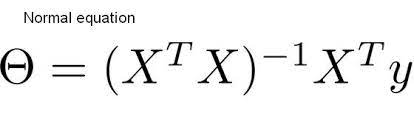


In [76]:
from numpy.linalg import inv
X_train_transpose = np.transpose(X_train2)
theta = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train2)),X_train_transpose),y_train)
theta

array([0.39104027, 0.10249619, 0.03716458, 0.03296675, 0.00497858,
       0.09130012, 0.33068422, 0.02185642])

### Evaluating the model

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [78]:
def predict(theta, data):
  predictions = []
  for row in data :
    predictions.append(np.inner(row, theta))
  return predictions

In [80]:
predictions = predict(theta, X_test2)
predictions

[0.6925820814166187,
 0.8104428766247169,
 0.5131089833261522,
 0.45419164474126533,
 0.4181595617346371,
 0.5865603259712198,
 0.9683588464810178,
 0.6638896599878918,
 0.7344208594626802,
 0.7989733943672223,
 0.9470132156264168,
 0.9553998304820559,
 0.7150273160395892,
 0.7422504251238334,
 0.6704809554002228,
 0.6090684357701756,
 0.6498785418307688,
 0.7266022665215652,
 0.7818243221818609,
 0.70040323245952,
 0.832044846879884,
 0.6520288162393675,
 0.7370365985458056,
 0.5670545654128755,
 0.7145616596715347,
 0.544509305577398,
 0.6601876282855034,
 0.5905025529727188,
 0.9515817506937305,
 0.7534872668037604,
 0.7898388036074702,
 0.768284796135363,
 0.7211158778954283,
 0.6379501184138304,
 0.8118155366705753,
 0.7845726797716288,
 0.7333552795809651,
 0.9381320063962926,
 0.6460666684524152,
 0.8130690122503241,
 0.9374390728452873,
 0.8052817572754061,
 0.48915405844449816,
 0.6937151302794979,
 0.8943221684496275,
 0.9617736417118554,
 0.9212587812854091,
 0.4422111078775

In [81]:
mean_absolute_error(y_test,predictions)

0.05884554603485322

In [82]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08358009329950593

In [83]:
explained_variance_score(y_test,predictions)

0.7176123476324918

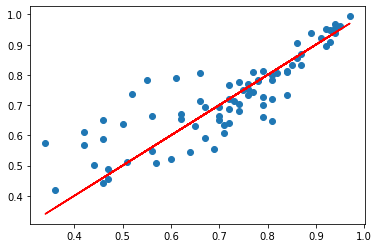

In [84]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Using Scikit Learn

In [85]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
predictions

array([0.69258208, 0.81044288, 0.51310898, 0.45419164, 0.41815956,
       0.58656033, 0.96835885, 0.66388966, 0.73442086, 0.79897339,
       0.94701322, 0.95539983, 0.71502732, 0.74225043, 0.67048096,
       0.60906844, 0.64987854, 0.72660227, 0.78182432, 0.70040323,
       0.83204485, 0.65202882, 0.7370366 , 0.56705457, 0.71456166,
       0.54450931, 0.66018763, 0.59050255, 0.95158175, 0.75348727,
       0.7898388 , 0.7682848 , 0.72111588, 0.63795012, 0.81181554,
       0.78457268, 0.73335528, 0.93813201, 0.64606667, 0.81306901,
       0.93743907, 0.80528176, 0.48915406, 0.69371513, 0.89432217,
       0.96177364, 0.92125878, 0.44221111, 0.57322734, 0.61250893,
       0.70244802, 0.77584558, 0.55531143, 0.99406201, 0.80993688,
       0.54892312, 0.90795649, 0.76566316, 0.75064753, 0.63427477,
       0.90600008, 0.77946092, 0.50299323, 0.64243595, 0.6647382 ,
       0.68195785, 0.50693471, 0.83263111, 0.80717519, 0.63238343,
       0.65395333, 0.72136173, 0.86819596, 0.85715903, 0.78372

In [86]:
mean_absolute_error(y_test,predictions)

0.05884554603485342

In [87]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08358009329950628

In [88]:
explained_variance_score(y_test,predictions)

0.7176123476324897

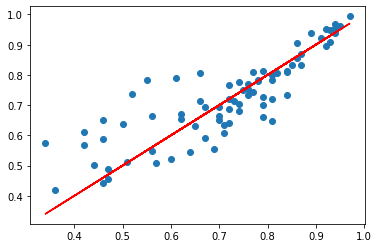

In [89]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')